In [18]:
# Import packages
import spacy
import re
import numpy as np
import pickle as pk
import pandas as pd
import string
import nltk
import matplotlib
from spacy import displacy
from collections import Counter
from nltk import word_tokenize, FreqDist,SnowballStemmer
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from nltk.util import ngrams

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/neo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/neo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/neo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
df = pd.read_csv('guardian_articles.csv')

In [21]:
#The data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149839 entries, 0 to 149838
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   article_id          149839 non-null  object
 1   sectionName         149839 non-null  object
 2   webTitle            149839 non-null  object
 3   webUrl              149839 non-null  object
 4   bodyContent         148731 non-null  object
 5   webPublicationDate  149839 non-null  object
 6   id                  149839 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 8.0+ MB


In [22]:
#Sample data
sampled_df = df.sample(n=10000, random_state=42)  # Set random_state for reproducibility

# Access the "content" column of the sampled DataFrame
sampled_content = sampled_df["bodyContent"]

In [23]:
# Do data preprocessing
#  tokenization, case lowering, punctuation removal, stopword removal, numeric removal
#  stemming/lemmatization

stop = stopwords.words('english') + ['guardian', 'news', 'theguardian.com', 'say', 'said', 'article']
snowball = SnowballStemmer('english')

def myPrep(text):
  if isinstance(text, str):
    toks = nltk.word_tokenize(text.lower())
    toks = [ t for t in toks if t not in string.punctuation+"’“”" ]
    toks = [ t for t in toks if t not in stop ]
    toks = [ t for t in toks if not t.isnumeric() ]
    toks = [ snowball.stem(t) for t in toks ]
    return toks
  else:
    return []

In [26]:
#Apply the data preprocessing to each articles
sampled_df['preprocessed_text'] = sampled_content.apply(myPrep)

In [27]:
# Function to extract n-grams from preprocessed text
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

In [28]:
# Generate bigrams and trigrams from preprocessed text
sampled_df['bigrams'] = sampled_df['preprocessed_text'].apply(lambda x: extract_ngrams(x, 2))
sampled_df['trigrams'] = sampled_df['preprocessed_text'].apply(lambda x: extract_ngrams(x, 3))

In [29]:
#Comine all bigram and trigram for each essay
all_bigrams = [bigram for sublist in sampled_df['bigrams'] for bigram in sublist]
all_trigrams = [trigram for sublist in sampled_df['trigrams'] for trigram in sublist]

In [30]:
# Count the frequency of each bigram and trigram
bigram_counts = Counter(all_bigrams)
trigram_counts = Counter(all_trigrams)

In [31]:
# Get the top 20 most frequent bigrams and trigrams
top_20_bigrams = bigram_counts.most_common(20)
top_20_trigrams = trigram_counts.most_common(20)

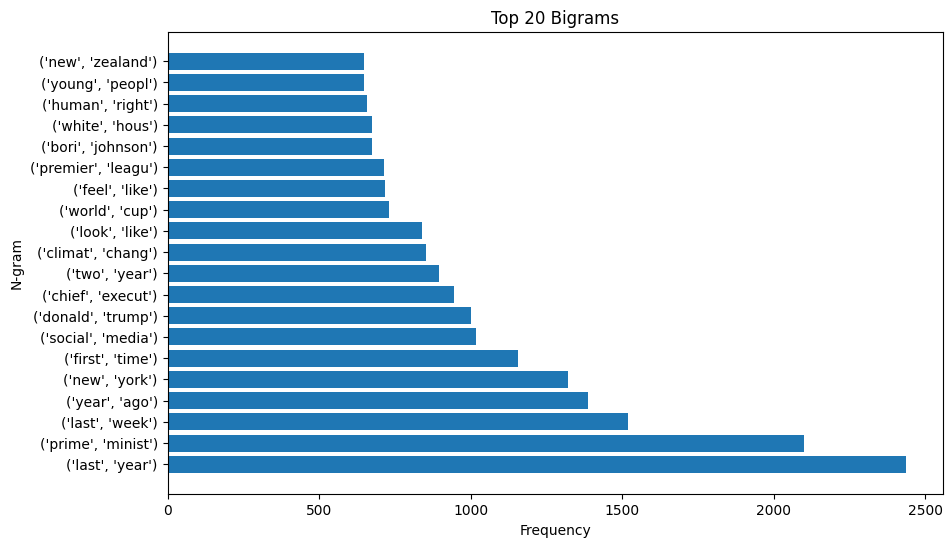

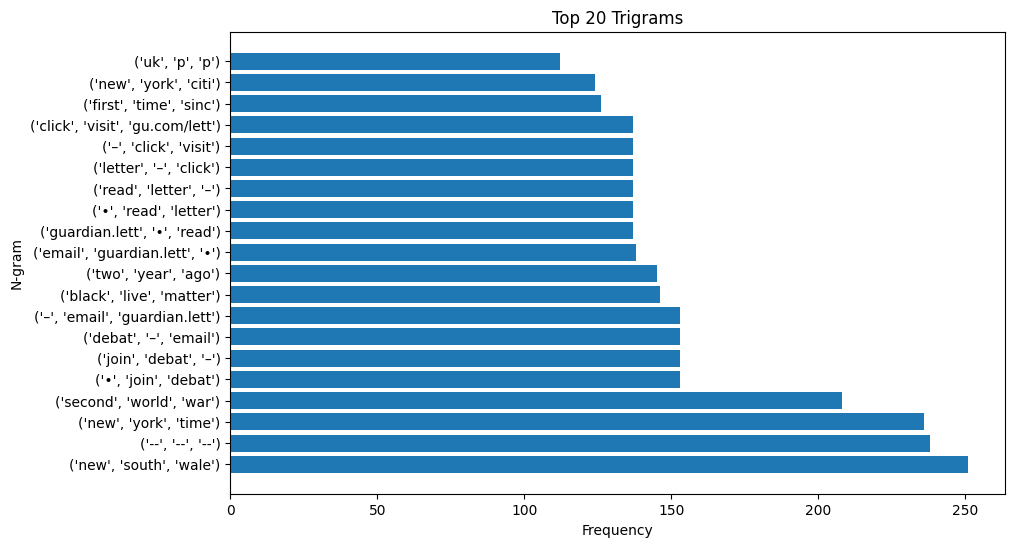

In [32]:
# Function to plot n-gram frequencies
def plot_ngrams(ngram_freq, title):
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(ngram_freq)), [freq for _, freq in ngram_freq], align='center')
    plt.yticks(range(len(ngram_freq)), [ngram for ngram, _ in ngram_freq])
    plt.xlabel('Frequency')
    plt.ylabel('N-gram')
    plt.title(title)
    plt.show()

# Plot top 20 bigrams
plot_ngrams(top_20_bigrams, 'Top 20 Bigrams')

# Plot top 20 trigrams
plot_ngrams(top_20_trigrams, 'Top 20 Trigrams')

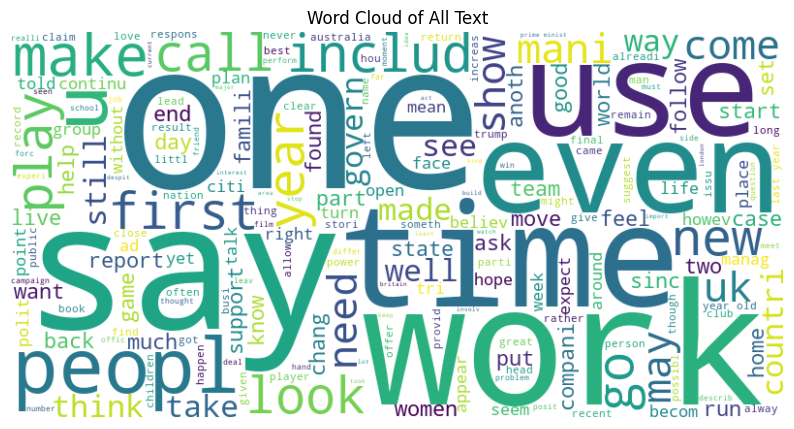

In [33]:
# Concatenate all preprocessed text data into a single string
all_text = ' '.join([' '.join(text) for text in sampled_df['preprocessed_text']])

# Generate word cloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Text')
plt.show()